<a href="https://colab.research.google.com/github/guddushah/Pneumonia-Detection-using-CNN/blob/main/pneumonia_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import random
random.seed(123)
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import cv2
import datetime
import itertools
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
import os

In [ ]:
for dirname, _, filenames in os.walk('C:/Users/guddu/Chest_Xray'):
    for filename in filenames:
        print(os.path.join(dirname, filename));

C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\.DS_Store
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\test\.DS_Store
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\test\NORMAL\IM-0001-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\test\NORMAL\IM-0003-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\test\NORMAL\IM-0005-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\test\NORMAL\IM-0006-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\test\NORMAL\IM-0007-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\test\NORMAL\IM-0009-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\test\NORMAL\IM-0010-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\test\NORMAL\IM-0011-0001-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\test\NORMAL\IM-0011-0001-0002.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\test\NORMAL\IM-0011-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\test\NORMAL\IM-0013-0001.jpeg
C:/Users/gu

C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\test\NORMAL\NORMAL2-IM-0139-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\test\NORMAL\NORMAL2-IM-0141-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\test\NORMAL\NORMAL2-IM-0145-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\test\NORMAL\NORMAL2-IM-0146-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\test\NORMAL\NORMAL2-IM-0150-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\test\NORMAL\NORMAL2-IM-0171-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\test\NORMAL\NORMAL2-IM-0173-0001-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\test\NORMAL\NORMAL2-IM-0173-0001-0002.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\test\NORMAL\NORMAL2-IM-0195-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\test\NORMAL\NORMAL2-IM-0196-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\test\NORMAL\NORMAL2-IM-0198-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_x

C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\NORMAL\IM-0115-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\NORMAL\IM-0117-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\NORMAL\IM-0119-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\NORMAL\IM-0122-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\NORMAL\IM-0125-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\NORMAL\IM-0127-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\NORMAL\IM-0128-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\NORMAL\IM-0129-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\NORMAL\IM-0131-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\NORMAL\IM-0133-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\NORMAL\IM-0135-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\NORMAL\IM-0137-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\trai

C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\PNEUMONIA\.DS_Store
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\PNEUMONIA\person1000_bacteria_2931.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\PNEUMONIA\person1000_virus_1681.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\PNEUMONIA\person1001_bacteria_2932.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\PNEUMONIA\person1002_bacteria_2933.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\PNEUMONIA\person1003_bacteria_2934.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\PNEUMONIA\person1003_virus_1685.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\PNEUMONIA\person1004_bacteria_2935.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\PNEUMONIA\person1004_virus_1686.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\PNEUMONIA\person1005_bacteria_2936.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\PNEUMONIA\person1005_virus_1688.jpe

C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\PNEUMONIA\person1737_bacteria_4573.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\PNEUMONIA\person1739_bacteria_4576.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\PNEUMONIA\person1740_bacteria_4579.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\PNEUMONIA\person1744_bacteria_4583.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\PNEUMONIA\person1745_bacteria_4584.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\PNEUMONIA\person1746_bacteria_4585.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\PNEUMONIA\person1748_bacteria_4588.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\PNEUMONIA\person1749_bacteria_4590.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\PNEUMONIA\person1751_bacteria_4592.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\PNEUMONIA\person1753_bacteria_4594.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\PNEUMO

C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\PNEUMONIA\person586_virus_1130.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\PNEUMONIA\person587_bacteria_2421.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\PNEUMONIA\person588_bacteria_2422.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\PNEUMONIA\person588_bacteria_2423.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\PNEUMONIA\person588_virus_1134.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\PNEUMONIA\person588_virus_1135.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\PNEUMONIA\person589_bacteria_2424.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\PNEUMONIA\person589_bacteria_2425.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\PNEUMONIA\person58_bacteria_272.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\PNEUMONIA\person58_bacteria_273.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\chest_xray\train\PNEUMONIA\person58_bacteria_2

C:/Users/guddu/Chest_Xray\chest_xray\test\NORMAL\NORMAL2-IM-0327-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\test\NORMAL\NORMAL2-IM-0328-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\test\NORMAL\NORMAL2-IM-0329-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\test\NORMAL\NORMAL2-IM-0330-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\test\NORMAL\NORMAL2-IM-0331-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\test\NORMAL\NORMAL2-IM-0332-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\test\NORMAL\NORMAL2-IM-0333-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\test\NORMAL\NORMAL2-IM-0335-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\test\NORMAL\NORMAL2-IM-0336-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\test\NORMAL\NORMAL2-IM-0337-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\test\NORMAL\NORMAL2-IM-0338-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\test\NORMAL\NORMAL2-IM-0339-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\test\NORMAL\NORMAL2-IM-0340-0001.jpeg
C:/Users/guddu/Chest_Xray

C:/Users/guddu/Chest_Xray\chest_xray\train\NORMAL\NORMAL2-IM-0870-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\NORMAL\NORMAL2-IM-0871-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\NORMAL\NORMAL2-IM-0872-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\NORMAL\NORMAL2-IM-0873-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\NORMAL\NORMAL2-IM-0874-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\NORMAL\NORMAL2-IM-0875-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\NORMAL\NORMAL2-IM-0876-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\NORMAL\NORMAL2-IM-0877-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\NORMAL\NORMAL2-IM-0879-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\NORMAL\NORMAL2-IM-0880-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\NORMAL\NORMAL2-IM-0881-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\NORMAL\NORMAL2-IM-0882-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\NORMAL\NORMAL2-IM-0885-0001.jpeg
C:/Users/gud

C:/Users/guddu/Chest_Xray\chest_xray\train\PNEUMONIA\person1372_bacteria_3501.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\PNEUMONIA\person1372_bacteria_3502.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\PNEUMONIA\person1372_bacteria_3503.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\PNEUMONIA\person1374_bacteria_3506.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\PNEUMONIA\person1374_bacteria_3507.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\PNEUMONIA\person1374_virus_2365.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\PNEUMONIA\person1375_bacteria_3509.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\PNEUMONIA\person1375_bacteria_3510.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\PNEUMONIA\person1375_virus_2366.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\PNEUMONIA\person1376_bacteria_3511.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\PNEUMONIA\person1376_virus_2367.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\PNEUMONIA\person1377_bacteria_3512.jpeg
C:/Users/gudd

C:/Users/guddu/Chest_Xray\chest_xray\train\PNEUMONIA\person397_virus_790.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\PNEUMONIA\person398_bacteria_1799.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\PNEUMONIA\person398_bacteria_1801.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\PNEUMONIA\person399_bacteria_1804.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\PNEUMONIA\person399_bacteria_1805.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\PNEUMONIA\person399_bacteria_1806.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\PNEUMONIA\person399_virus_793.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\PNEUMONIA\person39_bacteria_198.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\PNEUMONIA\person39_bacteria_200.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\PNEUMONIA\person3_bacteria_10.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\PNEUMONIA\person3_bacteria_11.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\PNEUMONIA\person3_bacteria_12.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\tra

C:/Users/guddu/Chest_Xray\chest_xray\train\PNEUMONIA\person870_virus_1516.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\PNEUMONIA\person871_bacteria_2793.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\PNEUMONIA\person871_virus_1517.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\PNEUMONIA\person872_bacteria_2795.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\PNEUMONIA\person873_bacteria_2796.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\PNEUMONIA\person874_bacteria_2797.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\PNEUMONIA\person875_bacteria_2798.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\PNEUMONIA\person876_bacteria_2799.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\PNEUMONIA\person877_bacteria_2800.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\PNEUMONIA\person877_virus_1525.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\PNEUMONIA\person878_bacteria_2801.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\train\PNEUMONIA\person878_virus_1526.jpeg
C:/Users/guddu/Chest_Xray\ch

C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\test\PNEUMONIA\._person100_bacteria_479.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\test\PNEUMONIA\._person100_bacteria_480.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\test\PNEUMONIA\._person100_bacteria_481.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\test\PNEUMONIA\._person100_bacteria_482.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\test\PNEUMONIA\._person101_bacteria_483.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\test\PNEUMONIA\._person101_bacteria_484.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\test\PNEUMONIA\._person101_bacteria_485.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\test\PNEUMONIA\._person101_bacteria_486.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\test\PNEUMONIA\._person102_bacteria_487.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\test\PNEUMONIA\._person10

C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\NORMAL\._IM-0417-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\NORMAL\._IM-0419-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\NORMAL\._IM-0420-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\NORMAL\._IM-0421-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\NORMAL\._IM-0423-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\NORMAL\._IM-0424-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\NORMAL\._IM-0425-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\NORMAL\._IM-0427-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\NORMAL\._IM-0428-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\NORMAL\._IM-0429-0001-0001.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\NORMAL\._IM-0429-0001-0002.jpeg


C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._.DS_Store
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1000_bacteria_2931.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1000_virus_1681.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1001_bacteria_2932.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1002_bacteria_2933.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1003_bacteria_2934.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1003_virus_1685.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1004_bacteria_2935.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1004_virus_1686.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person100

C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1663_bacteria_4411.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1663_bacteria_4412.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1665_bacteria_4415.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1666_bacteria_4416.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1667_bacteria_4417.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1667_bacteria_4418.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1668_bacteria_4420.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1668_bacteria_4421.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1669_bacteria_4422.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xra

C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person537_virus_1067.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person538_bacteria_2268.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person538_virus_1068.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person539_bacteria_2269.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person539_bacteria_2270.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person539_virus_1069.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person53_bacteria_252.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person53_bacteria_253.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person53_bacteria_254.jpeg
C:/Users/guddu/Chest_Xray\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._pers

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate = 1e-5)
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 10),
                 ModelCheckpoint(filepath = 'best_model.h5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
#defining path to the data directory
base_dir = 'C:/Users/guddu/Chest_Xray/chest_xray'
train_dir = base_dir + '/train'
test_dir = base_dir + '/test'
val_dir = base_dir + '/val'

In [ ]:
#training the data
train_normal = train_dir + '/NORMAL/'
train_pneu = train_dir + '/PNEUMONIA/'

#testing the data
test_normal = test_dir + '/NORMAL/'
test_pneu = test_dir + '/PNEUMONIA/'

#validation dataset
val_normal = val_dir + '/NORMAL/'
val_pneu = val_dir + '/PNEUMONIA/'

In [ ]:
#check for number of images in each dataset
#normal condition
print('Train Normal:', len(os.listdir(train_normal)))
print('Test Normal:', len(os.listdir(test_normal)))
print('Val Normal:', len(os.listdir(val_normal)))
print('\n')

#pneumonia condition
print('Train Pneumonia:', len(os.listdir(train_pneu)))
print('Test Pneumonia:', len(os.listdir(test_pneu)))
print('Val Pneumonia:', len(os.listdir(val_pneu)))

Train Normal: 1341
Test Normal: 234
Val Normal: 8


Train Pneumonia: 3875
Test Pneumonia: 390
Val Pneumonia: 8


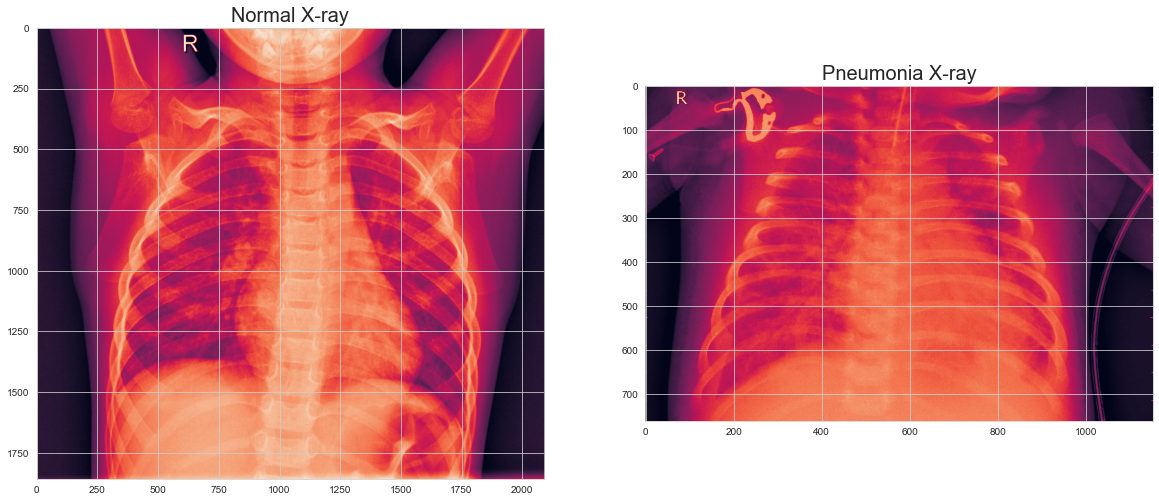

In [ ]:
from PIL import Image
from tensorflow.keras.utils import load_img

normal = Image.open(train_normal + os.listdir(train_normal)[0])
pneumonia = Image.open(train_pneu + os.listdir(train_pneu)[0])
fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Normal X-ray', fontsize = 20)
plt.imshow(normal)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Pneumonia X-ray', fontsize = 20)
plt.imshow(pneumonia)

In [ ]:
#visualize each class
import seaborn as sns

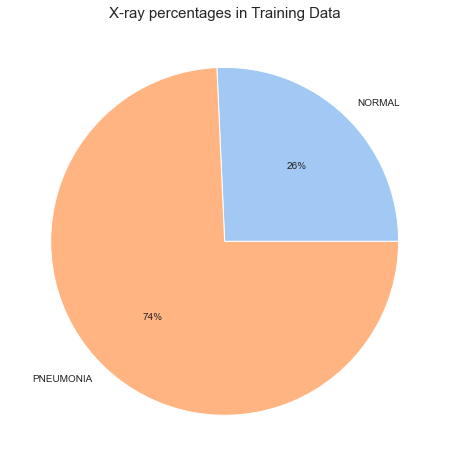

In [ ]:

data = [len(os.listdir(train_normal)), len(os.listdir(train_pneu))]
labels = ['NORMAL', 'PNEUMONIA']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize = (20, 8))

#create pie chart
plt.title('X-ray percentages in Training Data', fontsize = 15);
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

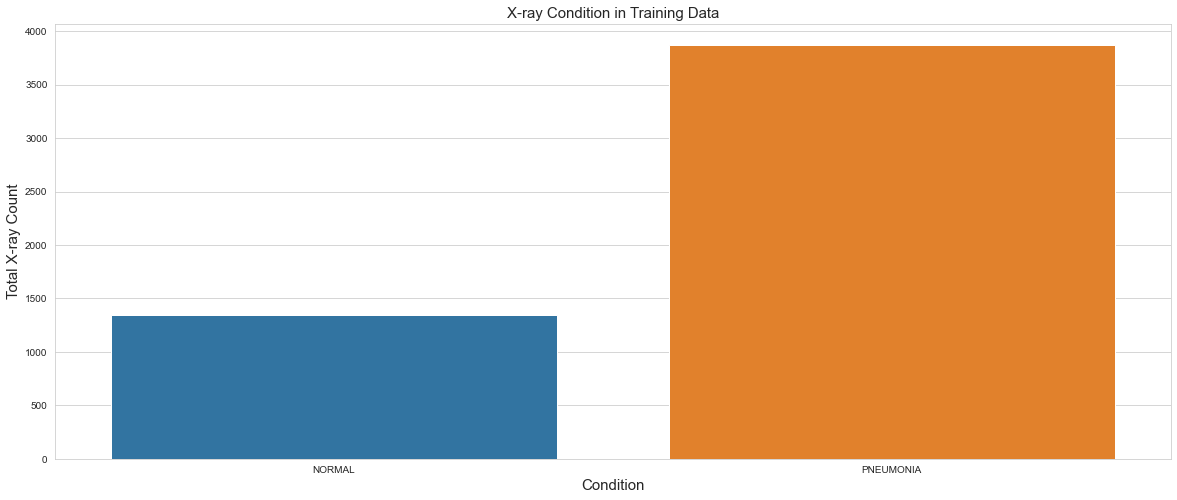

In [ ]:
plt.figure(figsize = (20, 8))

#Create bar chart
sns.barplot(x = ['NORMAL', 'PNEUMONIA'],
            y = [len(os.listdir(train_normal)), len(os.listdir(train_pneu))])
plt.xlabel('Condition', fontsize = 15)
plt.ylabel('Total X-ray Count', fontsize = 15)
plt.title('X-ray Condition in Training Data', fontsize = 15);

In [ ]:
#Data Augmentation

In [ ]:
#Generate data for class imbalance

from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array

train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range = 40, shear_range = 0.2, zoom_range = 0.2,
                                   width_shift_range = 0.2, height_shift_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255, rotation_range = 40, shear_range = 0.2, zoom_range = 0.2,
                                   width_shift_range = 0.2, height_shift_range = 0.2, horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255, rotation_range = 40, shear_range = 0.2, zoom_range = 0.2,
                                   width_shift_range = 0.2, height_shift_range = 0.2, horizontal_flip = True)

In [ ]:
print(train_datagen)

In [ ]:
#get all the data in the directory with specified batch sizes and image dimensions
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = 'binary')



Found 5216 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size = (150, 150),
                                                  batch_size = 32,
                                                  class_mode = 'binary',
                                                  shuffle = False)
val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size = (150, 150),
                                                batch_size = 32,
                                                class_mode = 'binary')

Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
import cv2
def picture_separation(folder):

    X = []
    y = []
    image_list = []

    for foldername in os.listdir(folder):
        if not foldername.startswith('.'):
            if foldername == "NORMAL":
                label = 0
            elif foldername == "PNEUMONIA":
                label = 1
            else:
                label = 2

            for image_filename in os.listdir(folder + "/"+ foldername):
                img_file = cv2.imread(folder + "/" + foldername + '/' + image_filename,0)


                if img_file is not None:
                    img = cv2.resize(img_file,(64,64))
                    img_arr = img_to_array(img) / 255
                    X.append(img_arr)
                    y.append(label)
                    image_list.append(foldername + '/' + image_filename)

    X = np.asarray(X)
    y = np.asarray(y)

    return X, y, image_list

In [ ]:
#get train dataset
X_train, y_train, img_train = picture_separation(train_dir)

train_df = pd.DataFrame(img_train, columns = ["images"])
train_df["target"] = y_train

#preview
train_df.head()

,images,target
0,NORMAL/IM-0115-0001.jpeg,0
1,NORMAL/IM-0117-0001.jpeg,0
2,NORMAL/IM-0119-0001.jpeg,0
3,NORMAL/IM-0122-0001.jpeg,0
4,NORMAL/IM-0125-0001.jpeg,0


In [ ]:
#get validation dataset
X_val, y_val, img_val = picture_separation(val_dir)

val_df = pd.DataFrame(img_val, columns = ["images"])
val_df["target"] = y_val

#preview
val_df.head()

,images,target
0,NORMAL/NORMAL2-IM-1427-0001.jpeg,0
1,NORMAL/NORMAL2-IM-1430-0001.jpeg,0
2,NORMAL/NORMAL2-IM-1431-0001.jpeg,0
3,NORMAL/NORMAL2-IM-1436-0001.jpeg,0
4,NORMAL/NORMAL2-IM-1437-0001.jpeg,0


In [ ]:
X_test, y_test, img_test = picture_separation(test_dir)

test_df = pd.DataFrame(img_test, columns = ["images"])
test_df["target"] = y_test

#preview
test_df.head()

,images,target
0,NORMAL/IM-0001-0001.jpeg,0
1,NORMAL/IM-0003-0001.jpeg,0
2,NORMAL/IM-0005-0001.jpeg,0
3,NORMAL/IM-0006-0001.jpeg,0
4,NORMAL/IM-0007-0001.jpeg,0


In [ ]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('\n')

print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)
print('\n')

print('X_val shape:', X_val.shape)
print('y_val shape:', y_val.shape)

X_train shape: (5216, 64, 64, 1)
y_train shape: (5216,)


X_test shape: (624, 64, 64, 1)
y_test shape: (624,)


X_val shape: (16, 64, 64, 1)
y_val shape: (16,)


In [ ]:
#we need to reshape them from (64, 64), a 64x64 matrix, to (4096,), a 4096-element vector
X_train = X_train.reshape(5216, 64*64).astype('float32')
X_test = X_test.reshape(624, 64*64).astype('float32')
X_val = X_val.reshape(16, 64*64).astype('float32')

In [ ]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('X_val shape:', X_val.shape)

X_train shape: (5216, 4096)
X_test shape: (624, 4096)
X_val shape: (16, 4096)


# CNN Model

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

#define the callbacks
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 10, verbose = 1),
                 ModelCheckpoint(filepath = 'cnn_model.h5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
from keras.layers import Dropout, Flatten
from keras import regularizers
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#initialize
cnn_model = models.Sequential()

#define model architecture
cnn_model.add(tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
cnn_model.add(tf.keras.layers.MaxPooling2D((2, 2)))

cnn_model.add(tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'))
cnn_model.add(tf.keras.layers.MaxPooling2D((2, 2)))

cnn_model.add(tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'))
cnn_model.add(tf.keras.layers.MaxPooling2D((2, 2)))

#fully connected layer
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation = 'relu'))
cnn_model.add(Dense(128, activation = 'relu'))

#one layer with sigmoid activation
cnn_model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
cnn_model.compile(loss = 'binary_crossentropy',
                  optimizer = keras.optimizers.Adam(0.0001),
                  metrics = ['acc'])

In [ ]:
print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0

In [ ]:
start = datetime.datetime.now()

#fit
cnn_history = cnn_model.fit(train_generator,
                            steps_per_epoch = 5216 // 32,
                            epochs = 20,
                            validation_data = test_generator,
                            validation_steps = 624 // 32,
                            callbacks = early_stopping)

Epoch 1/20
163/163 [==============================] - 240s 1s/step - loss: 0.5668 - acc: 0.7425 - val_loss: 0.6513 - val_acc: 0.6135
Epoch 2/20
163/163 [==============================] - 232s 1s/step - loss: 0.4738 - acc: 0.7694 - val_loss: 0.6859 - val_acc: 0.6447
Epoch 3/20
163/163 [==============================] - 222s 1s/step - loss: 0.3944 - acc: 0.8161 - val_loss: 0.5219 - val_acc: 0.7319
Epoch 4/20
163/163 [==============================] - 264s 2s/step - loss: 0.3194 - acc: 0.8562 - val_loss: 0.4979 - val_acc: 0.7549
Epoch 5/20
163/163 [==============================] - 222s 1s/step - loss: 0.2911 - acc: 0.8689 - val_loss: 0.5057 - val_acc: 0.7582
Epoch 6/20
163/163 [==============================] - 216s 1s/step - loss: 0.2733 - acc: 0.8798 - val_loss: 0.3914 - val_acc: 0.8322
Epoch 7/20
163/163 [==============================] - 271s 2s/step - loss: 0.2619 - acc: 0.8836 - val_loss: 0.4953 - val_acc: 0.7862
Epoch 8/20
163/163 [==============================] - 252s 2s/step - 

In [ ]:
end = datetime.datetime.now()
elapsed = end - start
print('Training took a total of {}'.format(elapsed))

Training took a total of 1:22:54.281608


In [ ]:
#Model Evaluation

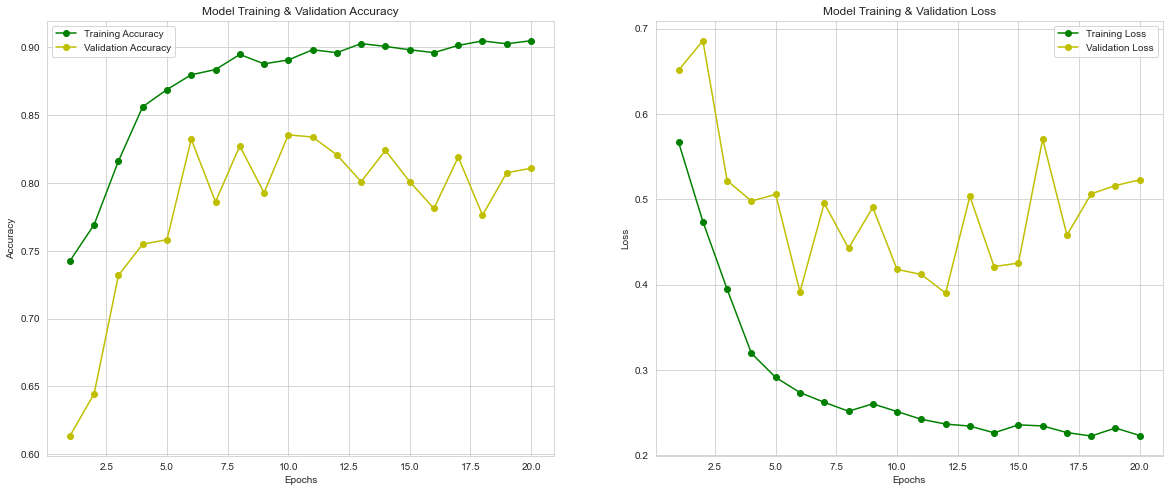

In [ ]:
fig , ax = plt.subplots(1,2)
fig.set_size_inches(20, 8)

cnn_train_acc = cnn_history.history['acc']
cnn_train_loss = cnn_history.history['loss']
cnn_val_acc = cnn_history.history['val_acc']
cnn_val_loss = cnn_history.history['val_loss']

epochs = range(1, len(cnn_train_acc) + 1)

ax[0].plot(epochs , cnn_train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , cnn_val_acc , 'yo-' , label = 'Validation Accuracy')
ax[0].set_title('Model Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , cnn_train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , cnn_val_loss , 'yo-' , label = 'Validation Loss')
ax[1].set_title('Model Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()

In [ ]:
#evaluate
print('Train loss & accuracy:' , cnn_model.evaluate(train_generator))
print('\n')
print('Test loss & accuracy:' , cnn_model.evaluate(test_generator))

163/163 [==============================] - 158s 968ms/step - loss: 0.2057 - acc: 0.9137
Train loss & accuracy: [0.20570041239261627, 0.9137269854545593]


20/20 [==============================] - 16s 771ms/step - loss: 0.4803 - acc: 0.8157
Test loss & accuracy: [0.48027998208999634, 0.8157051205635071]


In [ ]:
import keras
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
from sklearn.metrics import confusion_matrix
#define target for testing
y_test = test_generator.classes

#make prediction
yhat_test = cnn_model.predict(test_generator)
pred_class = np.where(cnn_model.predict(test_generator) > 0.5, 1, 0)

#y_pred  = (cnn_model.predict_classes(test_generator) > 0.5).astype("int32")

#y_pred=cnn_model.predict(test_generator)
#classes_y=np.argmax(y_pred,axis=1)

#get confusion matrix
cm = confusion_matrix(y_test, pred_class)
print(cm)


20/20 [==============================] - 16s 751ms/step
[[132 102]
 [ 18 372]]


In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Greens):

    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    plt.grid(b = None)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 fontsize = 12,
                 horizontalalignment = "center",
                 color = "white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

C:\Users\guddu\AppData\Local\Temp\ipykernel_7164\2857293636.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
C:\Users\guddu\AppData\Local\Temp\ipykernel_7164\2857293636.py:11: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b = None)


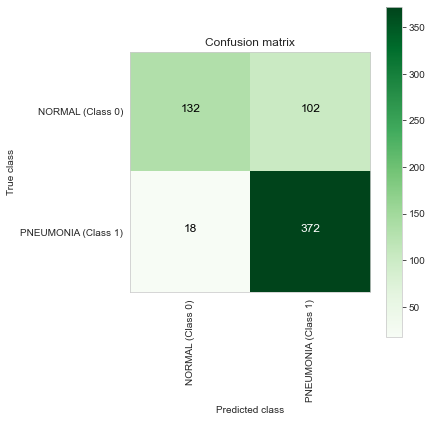

In [ ]:
#plot confusion matrix
#plot_confusion_matrix(cm,yhat_test, y_test ,labels = ['NORMAL (Class 0)','PNEUMONIA (Class 1)'], normalize = False)
plot_confusion_matrix(cm, classes = ['NORMAL (Class 0)','PNEUMONIA (Class 1)'], normalize = False)
#plot_confusion_matrix(cnn_model, X = test_generator.classes, y_true = pred_class, normalize=False)

#plot_confusion_matrix(y_test, pred_class, classes=[0,1], title='Confusion matrix, without normalization')


In [ ]:
#Classification report
from sklearn.metrics import classification_report

print('Model: CNN', '\n', classification_report(y_test, pred_class, target_names = ['NORMAL (Class 0)','PNEUMONIA (Class 1)']))

Model: CNN 
                      precision    recall  f1-score   support

   NORMAL (Class 0)       0.88      0.56      0.69       234
PNEUMONIA (Class 1)       0.78      0.95      0.86       390

           accuracy                           0.81       624
          macro avg       0.83      0.76      0.77       624
       weighted avg       0.82      0.81      0.80       624



AUC: 0.758974358974359


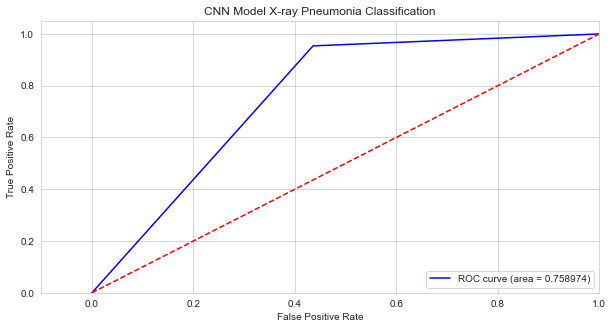

In [ ]:
from sklearn.metrics import auc,roc_curve,roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, pred_class)
auc = roc_auc_score(y_test, pred_class)
print('AUC:', auc)

plt.figure(figsize = (10, 5))
plt.plot(fpr, tpr, color = 'blue', label = 'ROC curve (area = %f)' % auc)
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'red')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CNN Model X-ray Pneumonia Classification')
plt.legend(loc = "lower right")
plt.show()

In [ ]:
#summary table
summary_table = pd.DataFrame({'Model': [],
                              'Accuracy': [],
                              'Precision': [], 'Recall': [], 'F1 Score': [],
                              'AUC': []})

In [ ]:
#update summary table
summary_table.loc[0] = ['Convolutional Neural Network Model',
                        round(accuracy_score(y_test, pred_class), 2),
                        round(precision_score(y_test, pred_class, average = 'macro'), 2),
                        round(recall_score(y_test, pred_class, average = 'macro'), 2),
                        round(f1_score(y_test, pred_class, average = 'macro'), 2),
                        round(roc_auc_score(y_test, pred_class), 2)]
summary_table.head()

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Convolutional Neural Network Model,0.81,0.83,0.76,0.77,0.76
